In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [9]:
# Load the Titanic dataset
df = pd.read_csv("https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv")

In [10]:
# Step 2: Find feature names with null values
null_columns = df.columns[df.isnull().any()]
print("Columns with Null values:", null_columns)

Columns with Null values: Index(['Age', 'Cabin', 'Embarked'], dtype='object')


In [11]:
# Step 3: Fill missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)

C:\Users\DFIT\AppData\Local\Temp\ipykernel_1216\410710532.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\DFIT\AppData\Local\Temp\ipykernel_1216\410710532.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

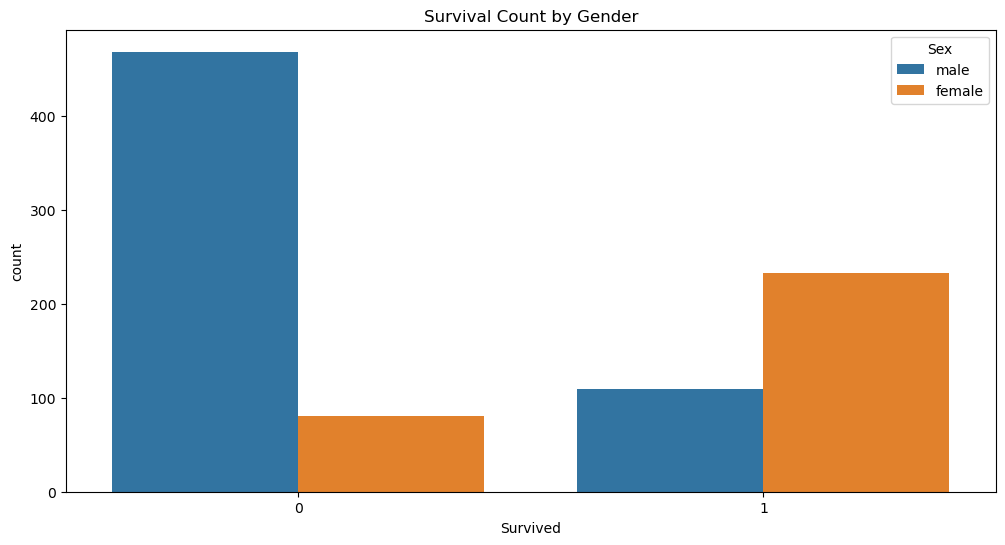

In [12]:
# Step 4 & 5: Bar plot for Survived vs Dead including Gender & Pclass
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title("Survival Count by Gender")
plt.show()

In [13]:
# Step 6: Creating AgeClass column
def age_class(age):
    if age <= 16: return 0
    elif age <= 26: return 1
    elif age <= 36: return 2
    elif age <= 62: return 3
    else: return 4
df['AgeClass'] = df['Age'].apply(age_class)

In [14]:
# Step 7: Drop 'Age' column
df.drop(columns=['Age'], inplace=True)

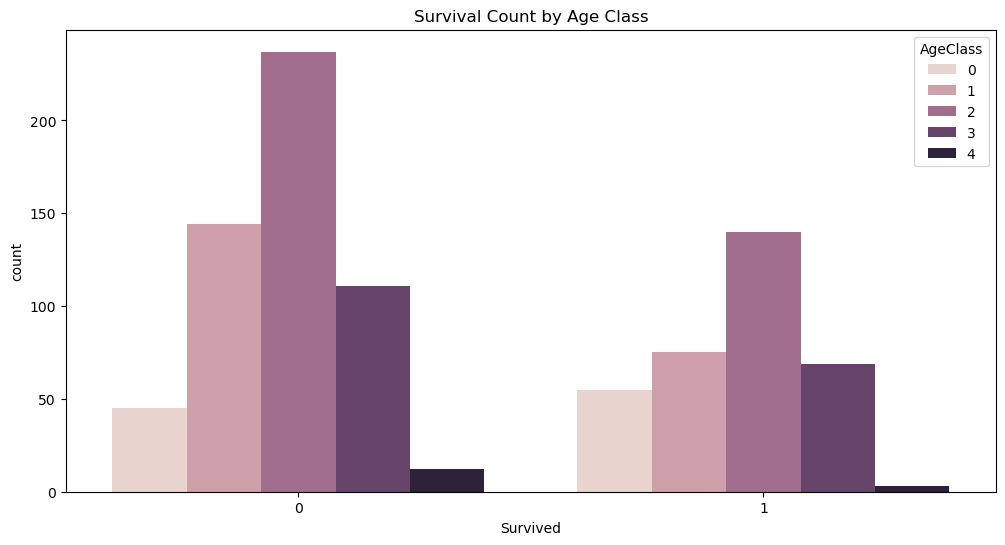

In [15]:
# Step 8: Bar plot for Survived vs Dead using AgeClass
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Survived', hue='AgeClass')
plt.title("Survival Count by Age Class")
plt.show()

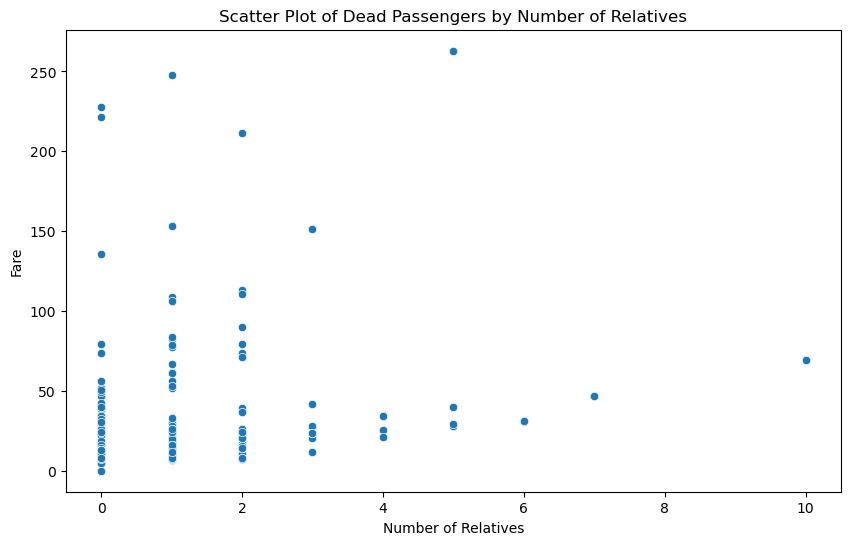

In [16]:
# Assignment 3: Scatter plot of Dead Passengers based on Number of Relatives
df['Number of Relatives'] = df['SibSp'] + df['Parch']
plt.figure(figsize=(10,6))
sns.scatterplot(data=df[df['Survived'] == 0], x='Number of Relatives', y='Fare')
plt.title("Scatter Plot of Dead Passengers by Number of Relatives")
plt.show()

In [22]:
# Project 2: Creating sample CSVs
students = [f"Student {i}" for i in range(1, 51)]
data_tt1 = pd.DataFrame({'Registration Number': range(1, 51), 'Name': students, 'TT-1 Marks': np.random.randint(5, 20, 50)})
data_tt2 = pd.DataFrame({'Registration Number': range(1, 51), 'Name': students, 'TT-2 Marks': np.random.randint(5, 20, 50)})

data_tt1.to_csv("term-test-1-result.csv", index=False)
data_tt2.to_csv("term-test-2-result.csv", index=False)

In [23]:
#step 3 Merging datasets
df_tt1 = pd.read_csv("term-test-1-result.csv")
df_tt2 = pd.read_csv("term-test-2-result.csv")
merged_df = pd.merge(df_tt1, df_tt2, on=['Registration Number', 'Name'])

In [24]:
# Step 4: Add Best and Average Marks
merged_df['Best Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)
merged_df['Average Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1)